## Exploratory Data Analysis on Dataset

In [1]:
#importing libraries


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing datasets


trainset = pd.read_csv("train.csv")
testset = pd.read_csv("test.csv")

In [3]:
#Since we need to Preprocess both the datasets, we will first concatenate them.


data = pd.concat([trainset.drop(['Survived'], axis=1), testset])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [4]:
#Since we dont require the names of the passengers
#we will only use the titles of their names eg. Mr., Mrs etc.


import re
data.Name.tail()

413              Spector, Mr. Woolf
414    Oliva y Ocana, Dona. Fermina
415    Saether, Mr. Simon Sivertsen
416             Ware, Mr. Frederick
417        Peter, Master. Michael J
Name: Name, dtype: object

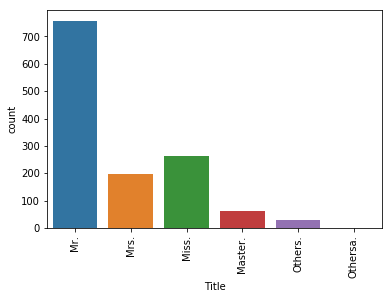

In [5]:
#We will filter the prefix and only use that for our further analysis


data['Title'] = data.Name.apply(lambda x: re.search('([A-Z][a-z]+\.)',x).group(1))


data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'},regex=True)
data['Title'] = data['Title'].replace(to_replace=['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt','Dedicteda', 'Countess', 'Jonkheer'],value='Others',regex=True)
sns.countplot(x='Title', data=data);
plt.xticks(rotation=90);


In [6]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [7]:
#Now let's drop the unwanted columns

data['Has_Cabin'] = ~data.Cabin.isnull()
data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,3,male,22.0,1,0,7.2500,S,Mr.,False
1,1,female,38.0,1,0,71.2833,C,Mrs.,True
2,3,female,26.0,0,0,7.9250,S,Miss.,False
3,1,female,35.0,1,0,53.1000,S,Mrs.,True
4,3,male,35.0,0,0,8.0500,S,Mr.,False


In [8]:
#Let us first take care of the null values in our datasets 
#and fill them with appropriate values

data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())
data['Embarked'] = data['Embarked'].fillna('S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   int64  
 1   Sex        1309 non-null   object 
 2   Age        1309 non-null   float64
 3   SibSp      1309 non-null   int64  
 4   Parch      1309 non-null   int64  
 5   Fare       1309 non-null   float64
 6   Embarked   1309 non-null   object 
 7   Title      1309 non-null   object 
 8   Has_Cabin  1309 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 133.3+ KB


In [9]:
#BINNING NUMERICAL DATA 
# because you have a range of ages and fares. However, 
# there might be fluctuations in those numbers that don't 
# reflect patterns in the data, which might be noise. 
# That's why you'll put people that are within a certain range of age
# or fare in the same bin. You can do this by using the pandas function 
# qcut() to bin your numerical data:

data['Age_Group'] = pd.qcut(data.Age, q=4, labels=False)
data['Fare_Group'] = pd.qcut(data.Fare, q=4, labels=False)

data=data.drop(['Age','Fare'],axis=1)

data['Family_Size'] = data.Parch + data.SibSp

data = data.drop(['SibSp','Parch'], axis=1) 

data.head()

,Pclass,Sex,Embarked,Title,Has_Cabin,Age_Group,Fare_Group,Family_Size
0,3,male,S,Mr.,False,0,0,1
1,1,female,C,Mrs.,True,3,3,1
2,3,female,S,Miss.,False,1,1,0
3,1,female,S,Mrs.,True,2,3,1
4,3,male,S,Mr.,False,2,1,0


In [13]:
#Convert all categorical data to numeric data


data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies.to_csv('dummies_data.csv', index=False)
data_dummies.head()

,Pclass,Has_Cabin,Age_Group,Fare_Group,Family_Size,Sex_male,Embarked_Q,Embarked_S,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Others.,Title_Othersa.
0,3,False,0,0,1,1,0,1,0,1,0,0,0
1,1,True,3,3,1,0,0,0,0,0,1,0,0
2,3,False,1,1,0,0,0,1,1,0,0,0,0
3,1,True,2,3,1,0,0,1,0,0,1,0,0
4,3,False,2,1,0,1,0,1,0,1,0,0,0


In [24]:
#Split your data back to train and test set

trainset_survived = trainset.Survived
trainset_survived.to_csv('survived_data.csv', index=False)

data_train = data_dum.iloc[:891]
data_test = data_dum.iloc[891:]

X=data_train.values
test = data_test.values
Y= trainset_survived.values

In [21]:
#Setting up hyperparameter grid

from sklearn import tree
from sklearn.model_selection import GridSearchCV

dep = np.arange(1,9)
param_grid={'max_depth' : dep}

#decision tree classifier
classifiers = tree.DecisionTreeClassifier()

clf_cv = GridSearchCV(classifiers, param_grid=param_grid,cv=5)

clf_cv.fit(X,Y)

# Print the tuned parameter and score
print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 3}
Best score is 0.8293766869625259


In [23]:
Y_pred = clf_cv.predict(test)
testset['Survived'] = Y_pred
testset[['PassengerId', 'Survived']].to_csv('dec_tree_feat_eng.csv', index=False)